In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv', index_col=0)


In [3]:
train['DateTime'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')
# 
train.dropna(inplace=True)

train_X = train.drop(['Is.Back', 'Customer.ID'], axis=1)
train_Y = train[['Is.Back']]
train['dtime'] = train['DateTime'].values.astype(np.int64)
train['target'] = np.where(train['Is.Back'] == 'Yes', 1, 0) 

([], <a list of 0 Text xticklabel objects>)

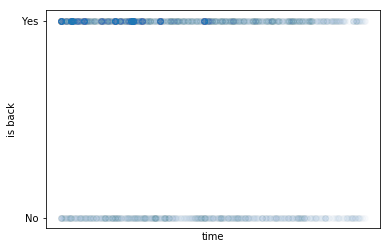

In [16]:
plt.scatter(train_X['Date'], train_Y['Is.Back'], alpha=0.01)
plt.ylabel('is back')
plt.xlabel('time')
plt.xticks([])

In [17]:
np.cov(train[['dtime', 'target']])

array([[8.33660699e+35, 8.52236076e+35, 8.42976278e+35, ...,
        8.33883826e+35, 8.48163996e+35, 8.46378975e+35],
       [8.52236076e+35, 8.71225344e+35, 8.61759222e+35, ...,
        8.52464175e+35, 8.67062532e+35, 8.65237737e+35],
       [8.42976278e+35, 8.61759222e+35, 8.52395953e+35, ...,
        8.43201899e+35, 8.57641640e+35, 8.55836673e+35],
       ...,
       [8.33883826e+35, 8.52464175e+35, 8.43201899e+35, ...,
        8.34107014e+35, 8.48391006e+35, 8.46605507e+35],
       [8.48163996e+35, 8.67062532e+35, 8.57641640e+35, ...,
        8.48391006e+35, 8.62919609e+35, 8.61103534e+35],
       [8.46378975e+35, 8.65237737e+35, 8.55836673e+35, ...,
        8.46605507e+35, 8.61103534e+35, 8.59291281e+35]])

In [18]:
train['year'] = train['DateTime'].dt.year
train['month'] = train['DateTime'].dt.month
train['day'] = train['DateTime'].dt.day
train['dayofweek'] = train['DateTime'].dt.dayofweek
train['dayofyear'] = train['DateTime'].dt.dayofyear
# train['hourofday'] = train['DateTime'].dt.hour # we don't have hour of day
train['quarter'] = train['DateTime'].dt.quarter
train['semester'] = np.where(train.quarter.isin([1,2]),1,2)
train['weekend'] = np.where(train.dayofweek.isin([0,6]), 1, 0)
time_features = ['dtime', 'year', 'month', 'day', 'target', 'dayofweek', 'dayofyear', 'quarter', 'semester', 'weekend']

In [19]:
train[time_features].corr()['target']

dtime       -0.399771
year        -0.223350
month       -0.104790
day         -0.113714
target       1.000000
dayofweek    0.013620
dayofyear   -0.114271
quarter     -0.136524
semester    -0.141267
weekend     -0.028380
Name: target, dtype: float64

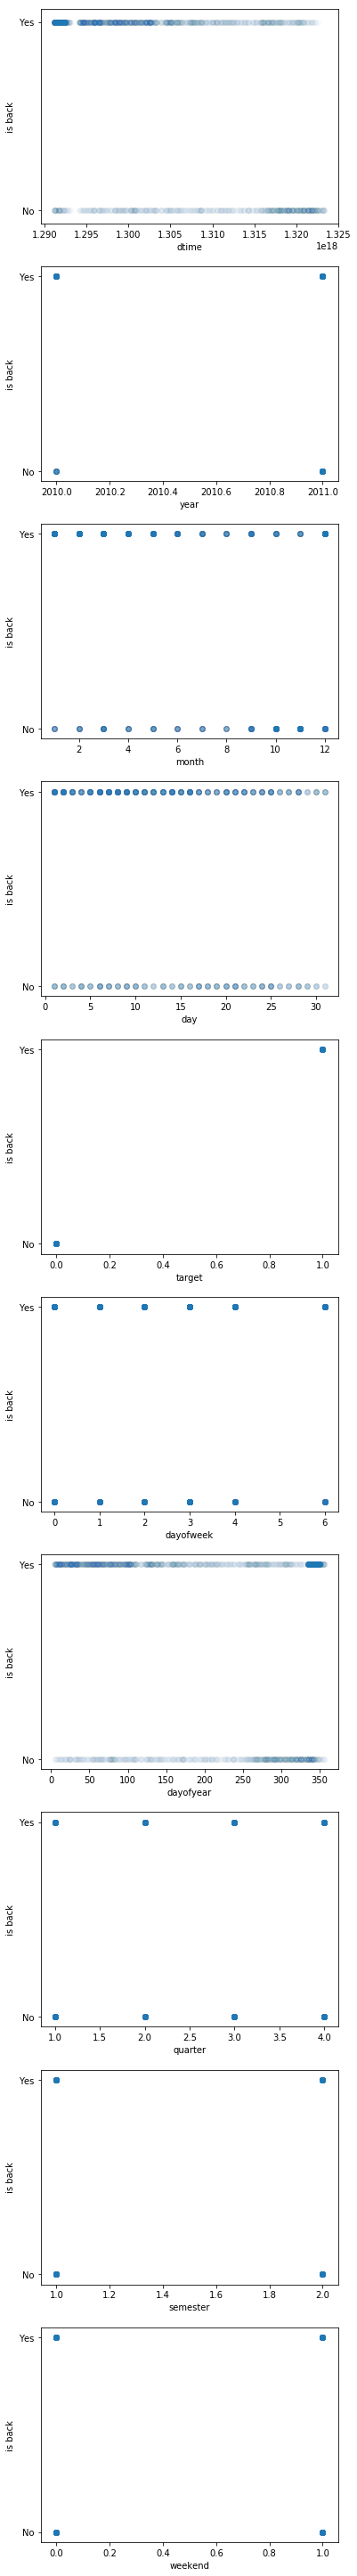

In [20]:
for feature, cnt in zip(time_features, range(len(time_features))):
    fig = plt.subplot(len(time_features), 1, cnt+1)
    plt.xlabel(feature)
    plt.ylabel('is back')
    plt.scatter(train[feature], train_Y['Is.Back'], alpha=0.01)
    plt.subplots_adjust(top=10)

In [92]:
train['DateTime'].dt.weekday_name.head(1)

1    Thursday
Name: DateTime, dtype: object